In [1]:
import ase
import numpy as np
from numpy.linalg import norm, svd
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
import soaplite
import genBasis
%matplotlib
#p.style.use('science')

Using matplotlib backend: TkAgg


In [2]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

struct0 = ase.io.read("res_structs/dump_50A.cfg")
struct0s = struct0.copy()
struct0s.set_cell((15,15,15))
struct0s = su.limit_pos(struct0s)
print(struct0s.get_cell())
print(len(struct0s.get_chemical_symbols()))
view(struct0s)

Cell([15.0, 15.0, 15.0], pbc=True)
197


In [3]:
structr = su.ran_sample(struct0,(15,15,15))
print(structr.get_cell())
print(len(structr.get_chemical_symbols()))
#structr = su.limit_pos(structr)
view(structr)

Cell([15.0, 15.0, 15.0], pbc=True)
189


In [4]:
np.random.seed(50)
def sample_vec(struct,cell,seed,method=2):
    struct = su.ran_sample(struct,cell,seed)
    n = 20
    s_norm = np.zeros(n)
    offset = np.linspace(0,9,n)
    for i in np.arange(n):
        struct_off = struct.copy()
        pos = struct_off.get_positions()
        shape = pos.shape
        #s = np.zeros(N)
        ran_pos = (np.random.random_sample(shape)-0.5)*2*offset[i]
        pos += ran_pos
        struct.set_positions(pos)
        struct.wrap(pbc=(1,1,1)) # atoms are wrapped inside unit cell to prevent atoms going outside of it
        mat = soaplite.get_periodic_soap_structure(struct_off, myAlphas, myBetas, rCut, NradBas, Lmax)
        s = svd(mat.transpose(), full_matrices=False, compute_uv=False)
        if method==0:
            s_norm[i] = norm(s, ord=1)
        elif method==1:
            s_norm[i] = norm(s)
        else:
            s_norm[i] = norm(s, ord=1)/norm(s)
    return s_norm

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

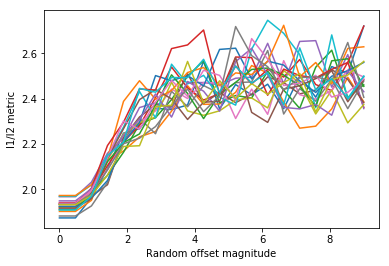

In [5]:
n = 20
np.random.seed(50)
Nsamples = 20
res1 = np.zeros((Nsamples,20))
offset = np.linspace(0,9,n)
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct0, (15,15,15), 50+i)
    res1[i] = vec
    p.plot(offset,vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

In [15]:
%matplotlib
p.plot(offset,res1.transpose())
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

Using matplotlib backend: TkAgg


Text(0, 0.5, 'l1/l2 metric')

In [16]:
var1 = np.var(res1, 0)
mean1 = np.mean(res1, 0)
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean1, yerr=5*var1)
p.xlabel('Random offset magnitude')
p.ylabel('mean l1/l2 metric')

Text(0, 0.5, 'mean l1/l2 metric')

In [18]:
structr = struct0.copy()
nums = structr.get_atomic_numbers()
nums = [1 for i in nums]
structr.set_atomic_numbers(nums)
#view(structr)

np.random.seed(50)
Nsamples = 20
res3 = np.zeros((Nsamples,20))
offset = np.linspace(0,9,n)
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(structr, (15,15,15), 50+i)
    res3[i] = vec
    p.plot(offset,vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

In [23]:
var3 = np.var(res3, 0)
mean3 = np.mean(res3, 0)
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean3, yerr=5*var3)
p.xlabel('Random offset magnitude')
p.ylabel('mean l1/l2 metric')

Text(0, 0.5, 'mean l1/l2 metric')

In [21]:
struct = su.rand_pos(struct0)

np.random.seed(50)
Nsamples = 20
res4 = np.zeros((Nsamples,20))
offset = np.linspace(0,9,n)
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct, (15,15,15), 50+i)
    res4[i] = vec
    p.plot(offset,vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1/l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1/l2 metric')

In [24]:
var4 = np.var(res4, 0)
mean4 = np.mean(res4, 0)
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean4, yerr=5*var4)
p.xlabel('Random offset magnitude')
p.ylabel('mean l1/l2 metric')

Text(0, 0.5, 'mean l1/l2 metric')

In [25]:
np.random.seed(50)
Nsamples = 20
res5 = np.zeros((Nsamples,20))
offset = np.linspace(0,9,n)
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct0, (15,15,15), 50+i,method=0)
    res5[i] = vec
    p.plot(offset,vec)
p.xlabel('Random offset magnitude')
p.ylabel('l1 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l1 metric')

In [39]:
p.plot(offset,res5.transpose())
p.xlabel('Random offset magnitude')
p.ylabel('l1 metric')

Text(0, 0.5, 'l1 metric')

In [40]:
var5 = np.var(res5, 0)
print(var5)
mean5 = np.mean(res5, 0)
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean5, yerr=0.001*var5)
p.xlabel('Random offset magnitude')
p.ylabel('mean l1 metric')

[ 36242.07255374  36241.41110251  40529.00129038  57890.88559378
  59173.19009488  95954.75591416  74415.38197219 100227.70396216
  83024.82694986  92883.39846555 107786.33365237  88211.95111999
  92454.80801793 127403.73353686  74080.44528175  99673.91415057
  82970.32123012 127727.66192386 122186.13305489  71810.26066445]


Text(0, 0.5, 'mean l1 metric')

In [41]:
np.random.seed(50)
Nsamples = 20
res6 = np.zeros((Nsamples,20))
offset = np.linspace(0,9,n)
for i in np.arange(Nsamples):
    print('step: %i' %i)
    vec = sample_vec(struct0, (15,15,15), 50+i,method=1)
    res6[i] = vec
    p.plot(offset,vec)
p.xlabel('Random offset magnitude')
p.ylabel('l2 metric')

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19


Text(0, 0.5, 'l2 metric')

In [52]:
var6 = 0.001*np.var(res6, 0)
mean6 = np.mean(res6, 0)
offset = np.linspace(0,9,n)
p.errorbar(x=offset, y=mean6, yerr=var6)
p.xlabel('Random offset magnitude')
p.ylabel('mean l2 metric')

Text(0, 0.5, 'mean l2 metric')

In [51]:
fig, axs = p.subplots(1,2,figsize=[9,4],sharey=False)
axs[0].plot(offset,res6.transpose())
axs[0].set_xlabel('Random offset magnitude')
axs[0].set_ylabel('l2 metric')

axs[1].errorbar(x=offset, y=mean6, yerr=var6)
axs[0].set_xlabel('Random offset magnitude')
axs[0].set_ylabel('mean l2 metric')

Text(0, 0.5, 'mean l2 metric')